# S&P 500 Market Segmentation

In [128]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data Preparation

In [129]:
# Read the dataset, parsing dates
df = pd.read_csv('data_monthly.csv', index_col=0, parse_dates=['Date'])

In [130]:
df.head() #Head Check

,SNA,KO,WM,JEC,MRK,PSA,MYL,VTR,PH,NOV,...,GPS,CA,UNH,WMB,HCA,ETN,HOLX,ACN,CMCSA,AZO
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-31,0.000013,-0.001509,0.003999,0.005587,0.000828,0.003026,0.001214,0.001031,-0.000960,0.002372,...,-0.001018,0.001302,0.001549,0.001134,0.002532,0.000643,0.003395,0.003162,-0.006924,0.007079
2013-02-28,-0.000358,0.002135,0.001371,0.000873,-0.000558,-0.000904,0.002510,0.003495,0.000962,-0.004256,...,0.000550,-0.000620,-0.001611,-0.000438,-0.000697,0.004591,-0.004563,0.001840,0.002411,0.001551
2013-03-31,0.001524,0.002204,0.002502,0.007143,0.001754,0.000392,-0.001054,0.001703,-0.001490,0.001966,...,0.003746,0.001377,0.003428,0.003877,0.004602,-0.000521,0.001816,0.001138,0.002736,0.002169
2013-04-30,0.001975,0.002194,0.002067,-0.004707,0.002862,0.003677,0.000279,0.003860,-0.001407,-0.003550,...,0.003294,0.003204,0.002255,0.000897,-0.000546,0.000328,-0.004621,0.003264,-0.000676,0.001509
2013-05-31,0.002834,-0.002698,0.001325,0.006665,-0.000419,-0.004202,0.003010,-0.005459,0.005795,0.004071,...,0.004084,0.001099,0.002596,-0.003691,-0.000854,0.004128,0.000693,0.000757,-0.001368,0.000657


In [131]:
df.describe() # Description of the dataset

,SNA,KO,WM,JEC,MRK,PSA,MYL,VTR,PH,NOV,...,GPS,CA,UNH,WMB,HCA,ETN,HOLX,ACN,CMCSA,AZO
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,...,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,0.000710,0.000198,0.000615,0.000431,0.000379,0.000401,0.000986,0.000121,0.000570,-0.000345,...,0.000111,0.000655,0.001213,0.000508,0.001004,0.000807,0.000647,0.000783,0.000542,0.000554
std,0.002279,0.001779,0.002564,0.003463,0.002271,0.002325,0.005988,0.003307,0.002741,0.003618,...,0.004790,0.002925,0.002156,0.004756,0.003306,0.003660,0.003156,0.002203,0.002537,0.002708
min,-0.005241,-0.004147,-0.013022,-0.007783,-0.006648,-0.004404,-0.009629,-0.013967,-0.005900,-0.008887,...,-0.011674,-0.004924,-0.004152,-0.014161,-0.005077,-0.005603,-0.006538,-0.006233,-0.006924,-0.007837
25%,-0.000459,-0.000642,-0.000164,-0.001768,-0.000828,-0.001416,-0.001811,-0.001735,-0.001073,-0.003092,...,-0.002751,-0.001004,-0.000113,-0.002752,-0.000845,-0.001385,-0.001647,-0.000657,-0.001041,-0.000793
50%,0.000610,0.000289,0.000680,-0.000082,0.000019,0.000089,0.000279,0.000086,0.000323,-0.000181,...,-0.000385,0.000321,0.001279,0.000897,0.000669,0.000643,0.000617,0.000757,0.001080,0.000657
75%,0.002004,0.001215,0.002245,0.002409,0.001928,0.002184,0.002770,0.002378,0.002772,0.001984,...,0.003091,0.001835,0.002650,0.002743,0.002556,0.002208,0.002230,0.002175,0.002066,0.002104
max,0.006193,0.003606,0.004972,0.010426,0.005037,0.004929,0.031924,0.005723,0.006997,0.008226,...,0.011473,0.016986,0.006484,0.011026,0.015598,0.018620,0.009247,0.006520,0.006248,0.007079


In [132]:
# Check for number of companies with larger missing values 
df.apply(lambda x: sum(x.isna())).sort_values(ascending=False) 

AZO      0
ZBH      0
XEL      0
DTE      0
MHK      0
PRU      0
JWN      0
YUM      0
ULTA     0
SPG      0
MTB      0
NFX      0
ESRX     0
SRCL     0
SBAC     0
CBG      0
NBL      0
GGP      0
CXO      0
SBUX     0
REG      0
NLSN     0
BCR      0
ETR      0
NKE      0
WFC      0
WLTW     0
LEN      0
SYMC     0
CMA      0
        ..
GWW      0
C        0
DLR      0
LLY      0
AET      0
TXN      0
MMC      0
HSIC     0
CTL      0
JPM      0
PVH      0
IR       0
MKC      0
GLW      0
MCK      0
RSG      0
AES      0
FIS      0
ADM      0
ECL      0
A        0
GOOGL    0
AWK      0
LYB      0
VMC      0
ALXN     0
HD       0
FTI      0
D        0
SNA      0
Length: 481, dtype: int64

In [133]:
df = df.T # Transpose the dataset to make it a multivariate time series

## 1. K-Means Clustering

In [134]:
from sklearn.cluster import KMeans

In [135]:
l = []

In [136]:
for i in range(2,75):
    model = KMeans(n_clusters=i).fit(df)
    d = {
        'model':model,
        'ss': model.inertia_,
        'nclusters': i,
    }
    l.append(d)

In [137]:
elbow = [i['ss'] for i in l]
elbow_ticks = [i['nclusters'] for i in l]
ss = pd.Series(elbow, index=elbow_ticks)

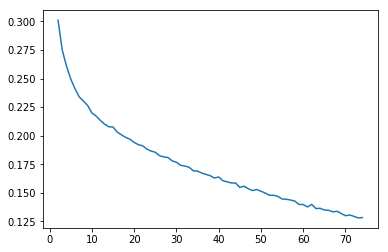

In [138]:
ss.plot()

In [139]:
model = KMeans(n_clusters=5).fit(df)
labels_kmeans_5 = model.labels_

In [140]:
model = KMeans(n_clusters=10).fit(df)
labels_kmeans_10 = model.labels_

In [141]:
model = KMeans(n_clusters=15).fit(df)
labels_kmeans_15 = model.labels_

In [142]:
df['labels_kmeans_5'] = labels_kmeans_5
df['labels_kmeans_10'] = labels_kmeans_10
df['labels_kmeans_15'] = labels_kmeans_15

## 2. Agglomorative (Hiarachical) Clustering

In [143]:
from sklearn.cluster import AgglomerativeClustering

In [144]:
model = AgglomerativeClustering(linkage='ward', n_clusters=5).fit(df)
labels_agglomorative_ward_5 = model.labels_

In [145]:
model = AgglomerativeClustering(linkage='ward', n_clusters=10).fit(df)
labels_agglomorative_ward_10 = model.labels_

In [146]:
model = AgglomerativeClustering(linkage='ward', n_clusters=15).fit(df)
labels_agglomorative_ward_15 = model.labels_

In [147]:
df['labels_agglomorative_ward_5']= labels_agglomorative_ward_5
df['labels_agglomorative_ward_10'] = labels_agglomorative_ward_10
df['labels_agglomorative_ward_15'] = labels_agglomorative_ward_15

## 3. Gaussian Mixture Models

In [148]:
from sklearn.mixture import GaussianMixture

In [149]:
def clust(df, comp, cov_type):
    gmix = GaussianMixture(n_components=comp,
                           covariance_type=cov_type, # 'spherical', 'diag', 'tied', 'full'
                           max_iter=25, 
                           random_state=0)

    gmix.fit(df.T)

    labels_gmix = gmix.predict(df.T)

    return labels_gmix, gmix.bic(df.T)

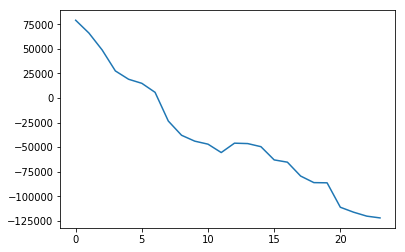

In [150]:
l = []
for i in range(1,25):
    l.append(clust(df.T, i, 'spherical')) # 'spherical', 'diag', 'tied', 'full'
l_spherical = l

pd.DataFrame(l)[1].plot()

E:\Anaconda\lib\site-packages\sklearn\mixture\base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


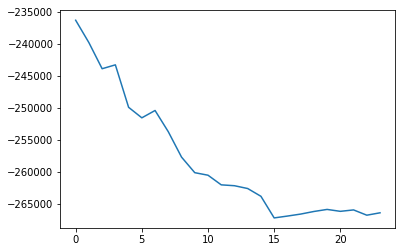

In [151]:
l = []
for i in range(1,25):
    l.append(clust(df.T, i, 'diag')) # 'spherical', 'diag', 'tied', 'full'
l_diag = l
    
pd.DataFrame(l)[1].plot()

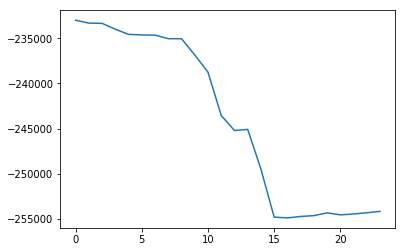

In [152]:
l = []
for i in range(1,25):
    l.append(clust(df.T, i, 'tied')) # 'spherical', 'diag', 'tied', 'full'
l_tied = l
    
pd.DataFrame(l)[1].plot()

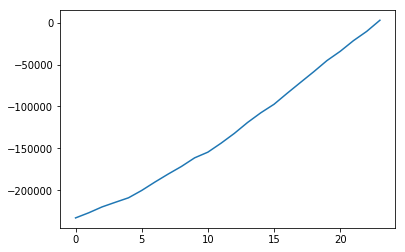

In [153]:
l = []
for i in range(1,25):
    l.append(clust(df.T, i, 'full')) # 'spherical', 'diag', 'tied', 'full'
l_full = l
    
pd.DataFrame(l)[1].plot()

In [154]:
labels_gmm_diag_5 = clust(df.T, 5, 'diag')[0]
labels_gmm_spherical_8 = clust(df.T, 8, 'spherical')[0]

## 4. Self Organizing Maps

In [155]:
from pyclustering.cluster.somsc import somsc

In [156]:
model = somsc(df.as_matrix(), 5)
model.process()

In [157]:
clusts_som_5 = pd.DataFrame(model.get_clusters())

model = somsc(df.as_matrix(), 10)
model.process()
clusts_som_10 = pd.DataFrame(model.get_clusters())

model = somsc(df.as_matrix(), 15)
model.process()
clusts_som_15 = pd.DataFrame(model.get_clusters())